        Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                     2.580                  0.136   241.97              10.6   
1                     2.552                  0.100   241.75              10.4   
2                     2.550                  0.100   241.64              10.4   
3                     2.550                  0.100   241.71              10.4   
4                     2.554                  0.100   241.98              10.4   
...                     ...                    ...      ...               ...   
260635                2.880                  0.360   239.01              12.0   
260636                2.892                  0.358   238.86              12.2   
260637                2.882                  0.280   239.05              12.0   
260638                2.660                  0.290   238.98              11.2   
260639                2.548                  0.354   239.25              10.6   

        Sub_metering_1  Sub

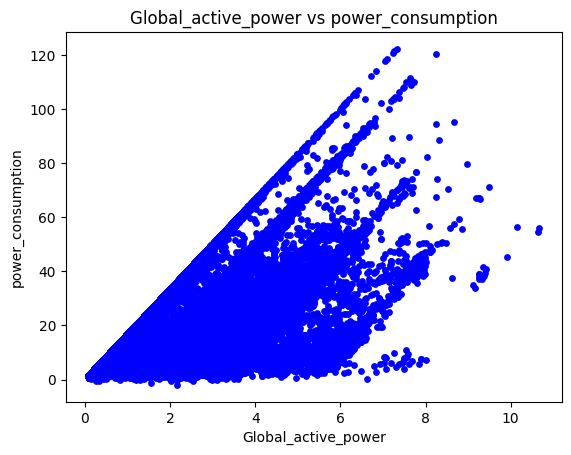

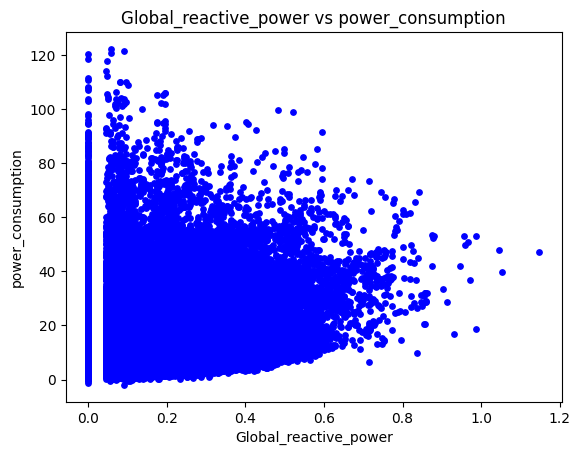

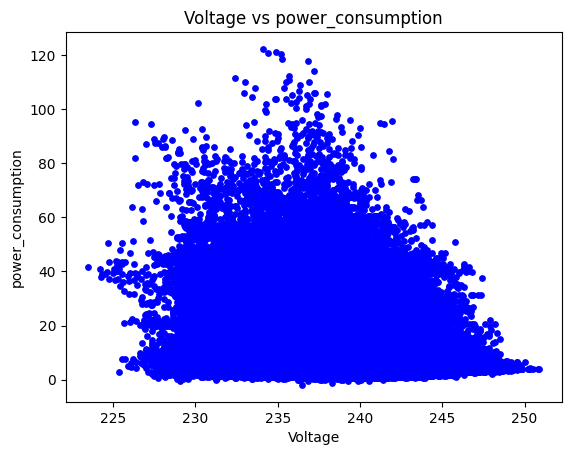

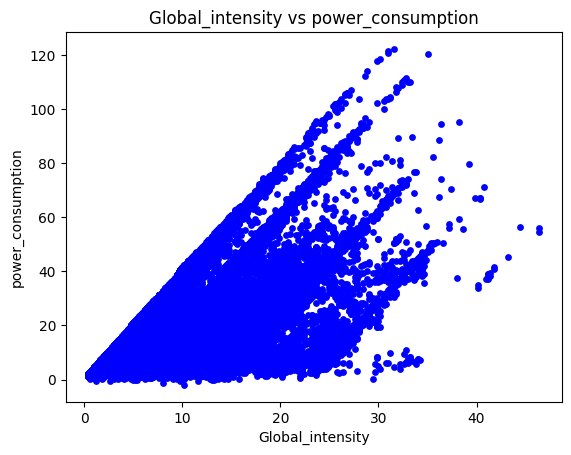

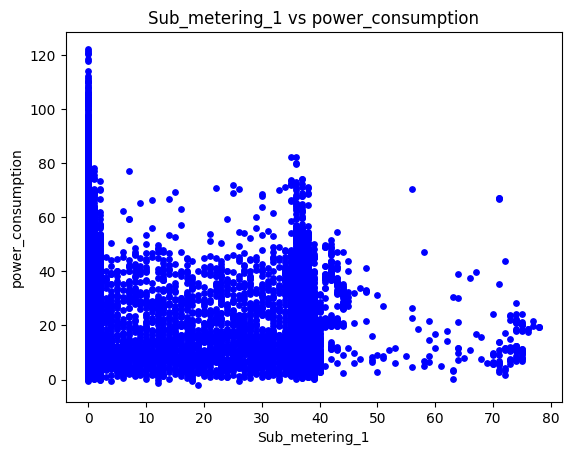

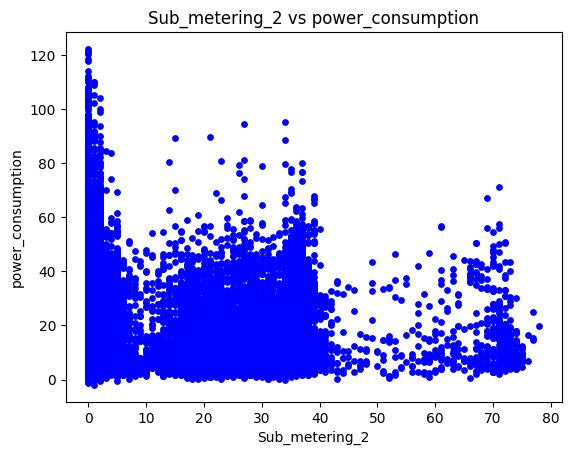

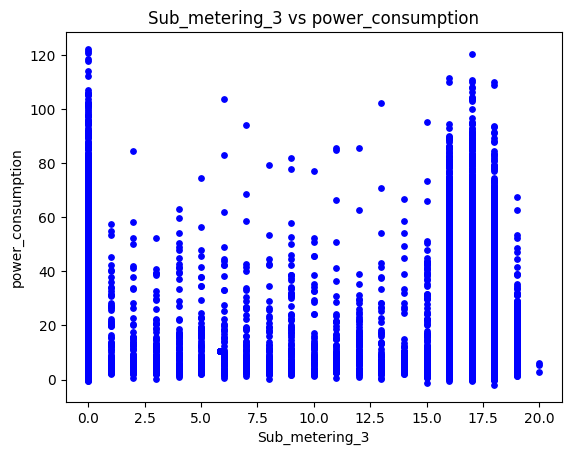

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
data = pd.read_csv('/content/household_power_consumption.csv')
data.replace(['?', 'nan', np.nan], -1, inplace=True)
data.ffill(axis=0, inplace=True)
p = data.drop('index', axis=1)
p = p.drop(['Date', 'Time'], axis=1)
p.replace(['?', 'nan', np.nan], -1, inplace=True)
numerical_features = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                      'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for i in numerical_features:
    p[i] = pd.to_numeric(p[i])
imp = SimpleImputer(missing_values=-1, strategy='mean')
p[numerical_features] = imp.fit_transform(p[numerical_features])
eq1 = (p['Global_active_power'] * 1000 / 60)
eq2 = p['Sub_metering_1'] + p['Sub_metering_2'] + p['Sub_metering_3']
p['power_consumption'] = eq1 - eq2
print(p)
X = p.drop('power_consumption', axis=1)
y = p['power_consumption']
 #plotting graphs
for feature in numerical_features:
    plt.scatter(X[feature],y,c='blue',s=15)
    plt.xlabel(feature)
    plt.ylabel('power_consumption')
    plt.title(f'{feature} vs power_consumption')
    plt.show()



Linear Regression Results:
Mean Squared Error (MSE): 0.00000
Mean Absolute Error (MAE): 0.00000
R-squared Score: 1.00000


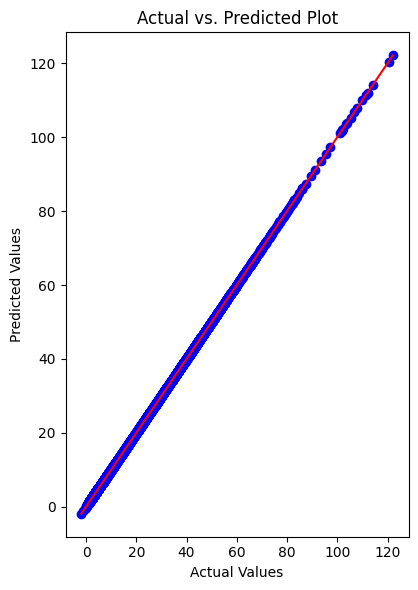

Text(0.5, 1.0, 'Bootstrap Predictions for Linear Regression')

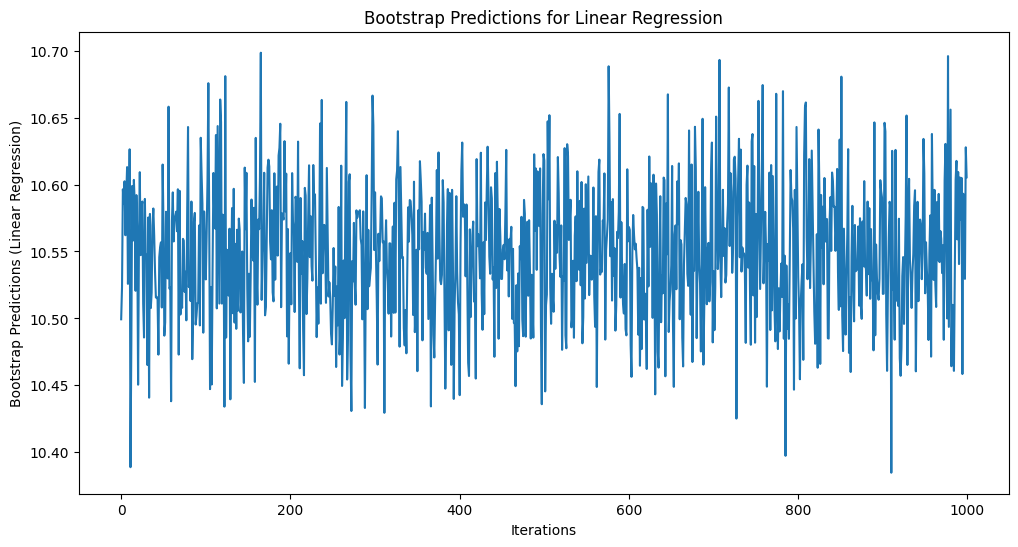

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Your data preprocessing code here

# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(xTrain, yTrain)
y_pred_linear = linear_model.predict(xTest)

# Calculate model performance metrics
mse_linear = mean_squared_error(yTest, y_pred_linear)
mae_linear = mean_absolute_error(yTest, y_pred_linear)
r2_linear = r2_score(yTest, y_pred_linear)

# Print performance metrics
print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse_linear:.5f}")
print(f"Mean Absolute Error (MAE): {mae_linear:.5f}")
print(f"R-squared Score: {r2_linear:.5f}")

# Create regression plots
plt.figure(figsize=(12, 6))

# Actual vs. Predicted Plot
plt.subplot(1, 3, 2)
plt.scatter(yTest, y_pred_linear, c='blue')
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], linestyle='-', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Plot")


plt.tight_layout()
plt.show()


n_iterations = 1000
n_size = len(yTest)
bootstrap_predictions_linear = []
bootstrap_predictions_svr = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred_linear = y_pred_linear[indices]
    #sample_pred_svr = y_pred_svr[indices]
    bootstrap_predictions_linear.append(np.mean(sample_pred_linear))
    #bootstrap_predictions_svr.append(np.mean(sample_pred_svr))
bootstrap_predictions_linear = np.array(bootstrap_predictions_linear)
#bootstrap_predictions_svr = np.array(bootstrap_predictions_svr)
standard_error_linear = np.std(bootstrap_predictions_linear)
#standard_error_svr = np.std(bootstrap_predictions_svr)
c = range(n_iterations)
plt.figure(figsize=(12, 6))
plt.plot(c, bootstrap_predictions_linear)
plt.xlabel("Iterations")
plt.ylabel("Bootstrap Predictions (Linear Regression)")
plt.title("Bootstrap Predictions for Linear Regression")

Mean Squared Error: 0.005216464852155434

Mean Absolute Error: 0.0514949382834548

Root Mean Squared Error: 0.07222509849183616

Enter Global_active_power: 0.5
Enter Global_reactive_power: 0.6
Enter voltage: 0.7
Enter Global_intensity: 0.8
Enter sub_metering_1: 0.1
Enter sub_metering_2: 0.2
Enter sub_metering_3: 0.3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Predicted consumption: 4.57


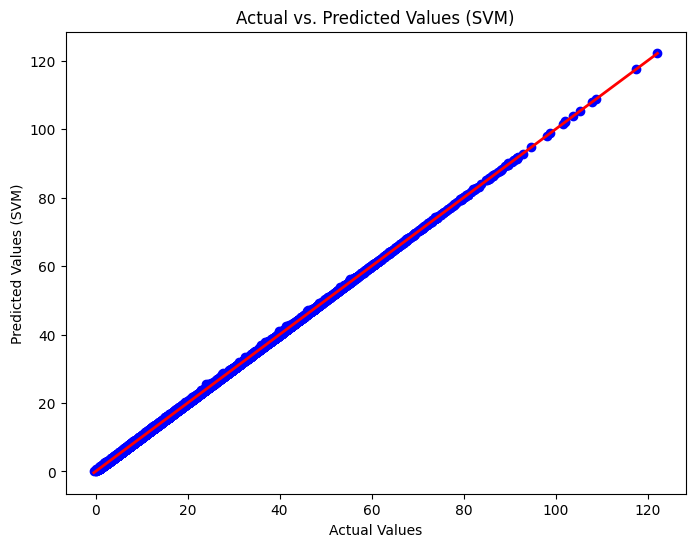

In [10]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your data and preprocess it here to create X and y
# Make sure to define X and y based on your dataset

# Example (replace this with your data loading and preprocessing)
# X = your_feature_matrix
# y = your_target_variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Scale the data if needed (use the same scaler you used in preprocessing)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create and train the SVR model
svr = SVR(kernel='linear')  # You can choose different kernels: 'linear', 'rbf', 'poly', etc.
svr.fit(x_train, y_train)

# Predict on the test data
y_pred = svr.predict(x_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}\n")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}\n")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}\n")

# Take user inputs and make predictions
GAP = float(input("Enter Global_active_power: "))
GRP = float(input("Enter Global_reactive_power: "))
vol = float(input("Enter voltage: "))
G_int = float(input("Enter Global_intensity: "))
SM_1 = float(input("Enter sub_metering_1: "))
SM_2 = float(input("Enter sub_metering_2: "))
SM_3 = float(input("Enter sub_metering_3: "))

user_inputs_scaled = scaler.transform(np.array([[GAP, GRP, vol, G_int, SM_1, SM_2, SM_3]]))

predicted_consumption = svr.predict(user_inputs_scaled)[0]

print(f"Predicted consumption: {predicted_consumption:.2f}")

# Create an actual vs. predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (SVM)")
plt.title("Actual vs. Predicted Values (SVM)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red', linewidth=2)

plt.show()




Lasso Regression Results:
Mean Squared Error (MSE): 0.79087
Mean Absolute Error (MAE): 0.56963
R-squared Score: 0.99383


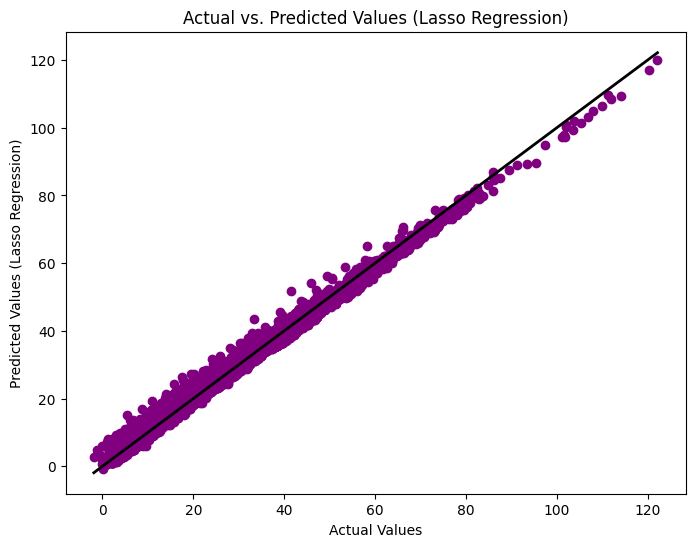

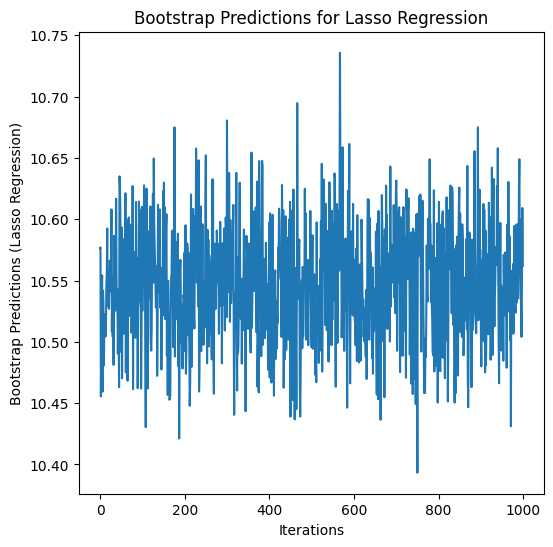

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(xTrain, yTrain)
y_pred_lasso = lasso_model.predict(xTest)
mse_lasso = mean_squared_error(yTest, y_pred_lasso)
mae_lasso = mean_absolute_error(yTest, y_pred_lasso)
r2_lasso = r2_score(yTest, y_pred_lasso)
print("\nLasso Regression Results:")
print(f"Mean Squared Error (MSE): {mse_lasso:.5f}")
print(f"Mean Absolute Error (MAE): {mae_lasso:.5f}")
print(f"R-squared Score: {r2_lasso:.5f}")

plt.figure(figsize=(8, 6))
plt.scatter(yTest, y_pred_lasso, c='purple')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Lasso Regression)")
plt.title("Actual vs. Predicted Values (Lasso Regression)")
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], linestyle='-', color='black', linewidth=2)

plt.show()

bootstrap_predictions_lasso = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred_lasso = y_pred_lasso[indices]
    bootstrap_predictions_lasso.append(np.mean(sample_pred_lasso))
bootstrap_predictions_lasso = np.array(bootstrap_predictions_lasso)
standard_error_lasso = np.std(bootstrap_predictions_lasso)
plt.figure(figsize=(6, 6))
plt.plot(c, bootstrap_predictions_lasso)
plt.xlabel("Iterations")
plt.ylabel("Bootstrap Predictions (Lasso Regression)")
plt.title("Bootstrap Predictions for Lasso Regression")
plt.show()


Ridge Regression Results:
Mean Squared Error (MSE): 0.00000
Mean Absolute Error (MAE): 0.00055
R-squared Score: 1.00000


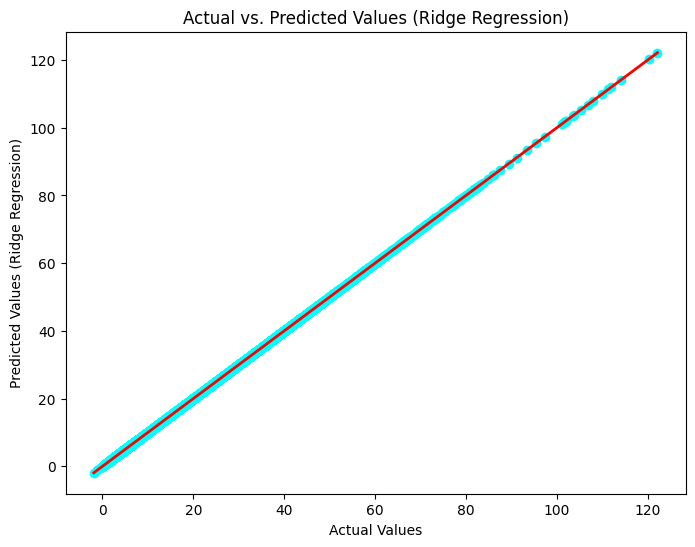

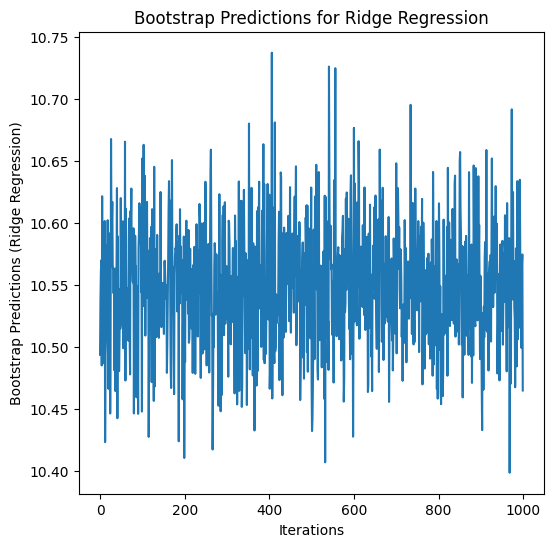

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(xTrain, yTrain)
y_pred_ridge = ridge_model.predict(xTest)
mse_ridge = mean_squared_error(yTest, y_pred_ridge)
mae_ridge = mean_absolute_error(yTest, y_pred_ridge)
r2_ridge = r2_score(yTest, y_pred_ridge)
print("\nRidge Regression Results:")
print(f"Mean Squared Error (MSE): {mse_ridge:.5f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.5f}")
print(f"R-squared Score: {r2_ridge:.5f}")

plt.figure(figsize=(8, 6))
plt.scatter(yTest, y_pred_ridge, c='cyan')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (Ridge Regression)")
plt.title("Actual vs. Predicted Values (Ridge Regression)")
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], linestyle='-', color='red', linewidth=2)

plt.show()

bootstrap_predictions_ridge = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred_ridge = y_pred_ridge[indices]
    bootstrap_predictions_ridge.append(np.mean(sample_pred_ridge))
bootstrap_predictions_ridge = np.array(bootstrap_predictions_ridge)
standard_error_ridge = np.std(bootstrap_predictions_ridge)
plt.figure(figsize=(6, 6))
plt.plot(c, bootstrap_predictions_ridge)
plt.xlabel("Iterations")
plt.ylabel("Bootstrap Predictions (Ridge Regression)")
plt.title("Bootstrap Predictions for Ridge Regression")
plt.show()


K-Nearest Neighbors (KNN) Regression Results:
Mean Squared Error (MSE): 0.51398
Mean Absolute Error (MAE): 0.31294
R-squared Score: 0.99599


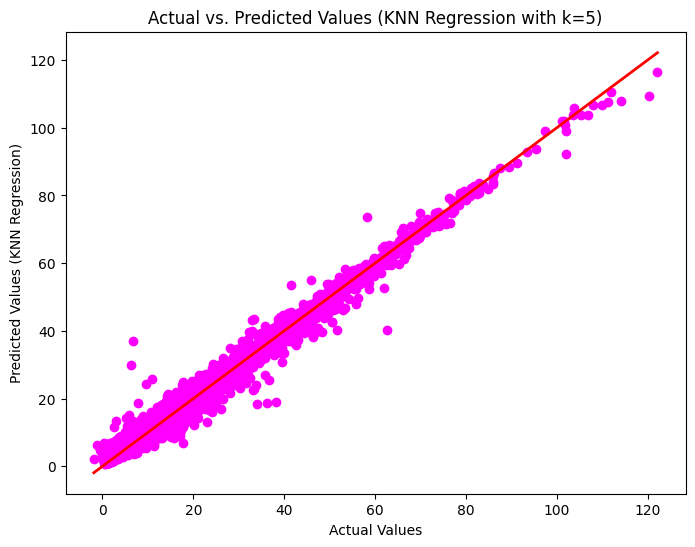

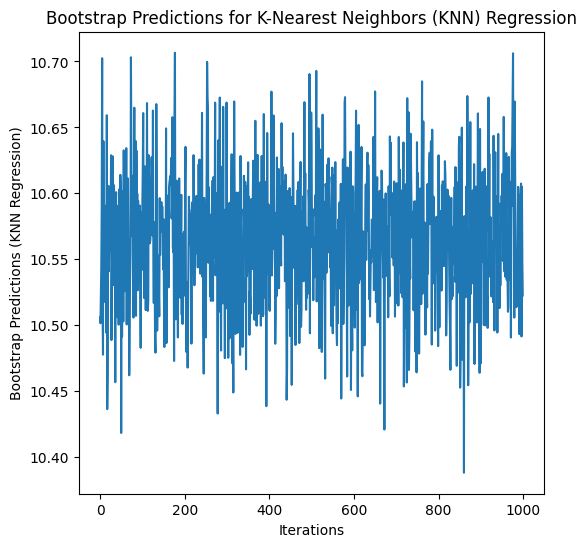

In [6]:
from sklearn.neighbors import KNeighborsRegressor
k = 5
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(xTrain, yTrain)
y_pred_knn = knn_model.predict(xTest)
mse_knn = mean_squared_error(yTest, y_pred_knn)
mae_knn = mean_absolute_error(yTest, y_pred_knn)
r2_knn = r2_score(yTest, y_pred_knn)
print("\nK-Nearest Neighbors (KNN) Regression Results:")
print(f"Mean Squared Error (MSE): {mse_knn:.5f}")
print(f"Mean Absolute Error (MAE): {mae_knn:.5f}")
print(f"R-squared Score: {r2_knn:.5f}")

# Create an actual vs. predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(yTest, y_pred_knn, c='magenta')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (KNN Regression)")
plt.title(f"Actual vs. Predicted Values (KNN Regression with k={k})")
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], linestyle='-', color='red', linewidth=2)

plt.show()

bootstrap_predictions_knn = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred_knn = y_pred_knn[indices]
    bootstrap_predictions_knn.append(np.mean(sample_pred_knn))
bootstrap_predictions_knn = np.array(bootstrap_predictions_knn)
standard_error_knn = np.std(bootstrap_predictions_knn)
plt.figure(figsize=(6, 6))
plt.plot(c, bootstrap_predictions_knn)
plt.xlabel("Iterations")
plt.ylabel("Bootstrap Predictions (KNN Regression)")
plt.title("Bootstrap Predictions for K-Nearest Neighbors (KNN) Regression")
plt.show()